# Model Analyses

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from src.evaluate import get_results_df
from src.misc import load_processed_dataset

import sys  

sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/')
%load_ext autoreload
%autoreload 2

In [7]:
stocks = ["NVDA", "JPM", "HD", "UNH"]
features = ['log_return', 'log_return_open', 'log_return_high', 'log_return_low', 'log_return_volume',
            'sma', 'wma', 'ema', 'dema', 'tema', 'aroon', 'rsi', 'willr', 'cci', 'ad', 'mom',
            'slowk', 'slowd', 'macd', 'fed_funds_rate', '^N225', '^IXIC', '^FTSE', '^SPX', '^DJI']

## Linear model

In [4]:
from src.models.statistical.Linear import data
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [5]:
coef_series = []

no_reg = []
L1 = []
L2 = []
for s in stocks:
    X_train, y_train, X_val, y_val, X_test, y_test = data(s, features)

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    series = pd.Series(index=X_train.columns, data=model.coef_).rename("Linear")
    series["intercept"] = model.intercept_
    no_reg.append(series)

    model = Lasso(fit_intercept=True, alpha=0.0004)
    model.fit(X_train, y_train)
    series = pd.Series(index=X_train.columns, data=model.coef_).rename("Lasso")
    series["intercept"] = model.intercept_
    L1.append(series)

    model = Ridge(fit_intercept=True, alpha=10000)
    model.fit(X_train, y_train)
    series = pd.Series(index=X_train.columns, data=model.coef_).rename("Ridge")
    series["intercept"] = model.intercept_
    L2.append(series)

coef_series.append(pd.concat(no_reg).groupby(level=0).mean())
coef_series.append(pd.concat(L1).groupby(level=0).mean())
coef_series.append(pd.concat(L2).groupby(level=0).mean())

df = pd.concat(coef_series, axis=1)
df = df.sort_values(by="Ridge")
df

,Linear,Lasso,Ridge
ad,-0.00019192,-0.00018916,-0.00014133
rsi,-0.00038000,-0.00014313,-0.00013916
fed_funds_rate,-0.00023750,-0.00008802,-0.00011345
willr,0.00040780,-0.00003584,-0.00007492
cci,0.00020521,0.00000000,-0.00004141
ema,-0.00021096,-0.00001220,-0.00002427
mom,-0.00005198,0.00000000,-0.00002045
aroon,0.00022882,0.00000000,-0.00000883
log_return,-0.03744253,0.00000000,-0.00000705
^IXIC,0.03642702,0.00000000,-0.00000675


<Axes: title={'center': 'Feature Importances for Linear, Lasso, and Ridge Models'}>

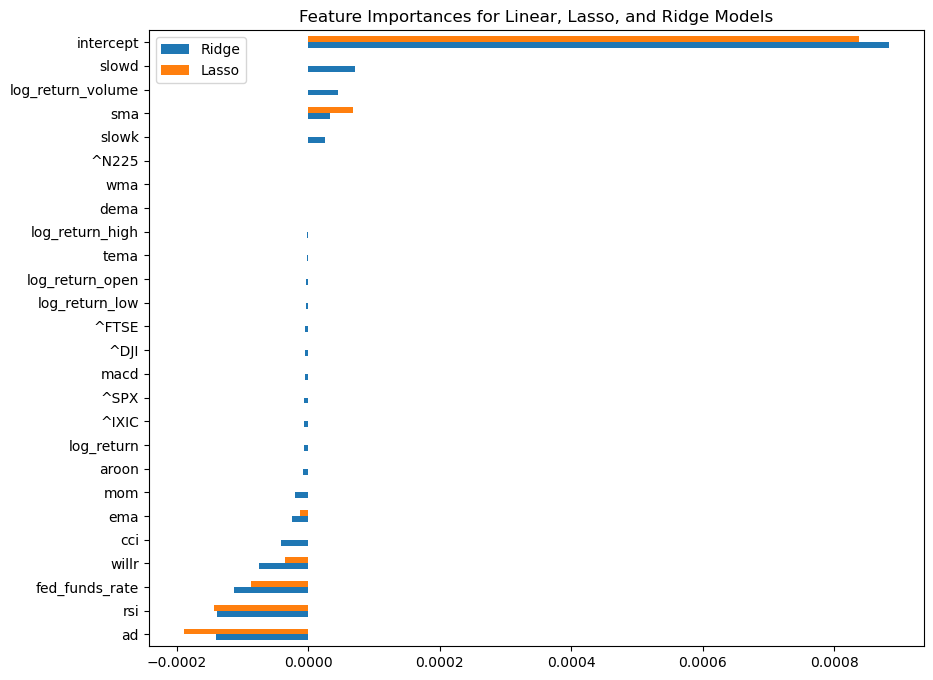

In [6]:
df[["Ridge", "Lasso"]].plot(kind='barh', figsize=(10, 8), title='Feature Importances for Linear, Lasso, and Ridge Models')

## Random forest

In [ ]:
from src.models.statistical.RandomForest import data
from sklearn.ensemble import RandomForestRegressor

for s in stocks:
    X_train, y_train, X_val, y_val, X_test, y_test = data(s, features)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    print(pd.Series(index=X_train.columns, data=model.feature_importances_).sort_values())
